In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

In [2]:
url = 'https://github.com/esnt/Data/raw/main/CleanData/icecreamcone2.csv'
df = pd.read_csv(url)
df.shape

(36, 5)

In [4]:
df.head(2)

,tempC,saltPct,waterPct,batVis,logBV
0,15.0,0.0,29.5,820,6.709304
1,15.0,0.0,32.0,234,5.455321


In [33]:
#features = df[['tempC','saltPct','waterPct']]

## For visualization purposes, I will only use one feature in this code
features = df[['waterPct']]
features = StandardScaler().fit_transform(features)
target = df['logBV']
n = len(target)

In [34]:
### Use Linear Regression from sklearn
rounding_level = 4

lm = LinearRegression()
lm.fit(features, target)
beta_LR = [lm.intercept_.round(rounding_level)] + list(lm.coef_.round(rounding_level))
print(beta_LR)

[4.8455, -0.4246]


In [35]:
# Add the intercept term to the X matrix for normal-equations computation
X = PolynomialFeatures(degree=1).fit_transform(features)
y = target.values.reshape(n,1)
X.shape, y.shape

((36, 2), (36, 1))

In [36]:
# normal equations
beta_normal = np.linalg.inv(X.T @ X) @ X.T @ y
print(beta_normal.round(rounding_level))

[[ 4.8455]
 [-0.4246]]


### Gradient Descent Algorithm

In [47]:
# number of coefficients or model weights
p = X.shape[1]

# learning rate
eta = .01

# define number of epochs
epochs = 500 


# initial values for the coefficients 
# the gd in beta_gd is for gradient descent)
beta_gd = np.zeros((p,1))
save_betas = []
cost = []

for e in range(epochs):
    save_betas.append(beta_gd)
    gradients = (1/n) * X.T @ (X @ beta_gd - y)
    new_betas = beta_gd - eta * gradients
    change = np.abs(new_betas - beta_gd).sum()
    beta_gd = new_betas



    ## Here I'm just saving the cost function value and coefficients at each iteration
    yhat = X @ beta_gd
    residuals = yhat - y
    cost.append((1/(2*n)) * residuals.T @ residuals)

# convert the lists of saved values to numpy arrays
save_betas = np.array(save_betas)
cost = np.array(cost).flatten()

print(change)
print(epochs)
print(beta_gd)


0.0003497696342812384
500
[[ 4.81365264]
 [-0.42183403]]


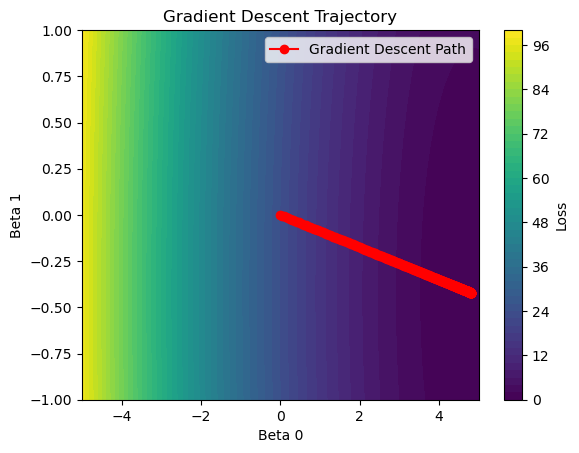

In [48]:
# plot the cost function value at each iteration

b0_range = np.linspace(-5, 5, 100)
b1_range = np.linspace(-1, 1, 100)
B0, B1 = np.meshgrid(b0_range, b1_range)
Z = np.array([
    np.mean(((B0_val + B1_val * X[:, 1]) - y.ravel())**2)
    for B0_val, B1_val in zip(B0.ravel(), B1.ravel())
]).reshape(B0.shape)

plt.contourf(B0, B1, Z, levels=50, cmap="viridis")
plt.colorbar(label="Loss")
plt.title("Gradient Descent Trajectory")
plt.xlabel("Beta 0")
plt.ylabel("Beta 1")

plt.plot(save_betas[:, 0], save_betas[:, 1], 'r-o', label="Gradient Descent Path")
plt.legend()
plt.show()